<p style="text-align: center;"> <span style="color:firebrick"> <font size="5"> <b> USC Marshall School of Business </b> </font> </p> </span> 

<p style="text-align: center;"> <b> <font font size="5"> DSO 545- Homework 3 </p> </b></font>

<p style="text-align: center;"> <b> Fall 2020 </b> </p>


## <span style="color:blue">  Bufan Wang </span>

## <span style="color:firebrick">  Assignment Learning Objectives </span>

- Read JSON data into `Python`
- Slice, aggregrate, and filter data using `pandas`
- Perform univariate, bivariate, and multivariate EDA


## <span style="color:firebrick"> Assignment Description </span>

### Bank Customer Churn

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. Banks, telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. (https://en.wikipedia.org/wiki/Customer_attrition)

You work at a multinational bank that is aiming to increase it's market share in Europe. Recently, it has been noticed that the number of customers using the banking services has declined, and the bank is worried that existing customers have stopped using them as their main bank. As a data scientist, you are tasked with finding out the reasons behind customer churn and to predict customer churn. The marketing team, in particular, is interested in your findings and want to better understand what are the potential reasons that they are having this decline in their customers. Your results will help the marketing team to use their budget wisely to target potential churners.

## <span style="color:firebrick"> Dataset </span>

The dataset consists of 12 variables, and it is available on Kaggle.

**Source**: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

    
|**Variables**    |**Explanation**|
|:-----------------|:--------------|
|`CustomerId`| customer's identification number
|`CredRate`| A credit score is a number between 300–850 that depicts a consumer's creditworthiness. The higher the score, the better a borrower looks to potential lenders.
|`Geography`| the regional bank has customers from three countries: France, Germany and Spain
|`Gender` | customer's gender
|`Age`| customer's age
|`Tenure`| years that the customer has stayed with the bank
|`Balance` | the amount of money available for withdrawal (\$)
|`Product Num`| number of products/services that the customers use in the bank
|`HasCrCard`| 1 indicates that the customer has a credit card, 0 otherwise
|`ActMem`| 1 indicates that the customer is an active member and using the bank's products and services and 0, otherwise
|`EstimatedSalary`| customer’s self-reported annual salary (\$)
|`Exited`| whether the customer has churned (closed the bank account), 1 indicates churn.



## <span style="color:firebrick"> Questions </span>


### Technical Questions

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
bankdata = pd.read_json('bank.json')
bankdata.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


#### 1. <span style="color:firebrick"> *(1 point)*  </span> What is the number of French, Spanish, and German customers in our dataset?

In [4]:
bankdata['Geography'].value_counts()

# 5014 customers are from France, 2509 customers are from Germany, and 2477 customers are from Spain.

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

#### 2. <span style="color:firebrick"> *(1 point)*  </span> What is the percentage of customers who churned?

In [33]:
bankdata['Exited'].value_counts(normalize = True)*100

# 20.37% of customers churned.

0    79.63
1    20.37
Name: Exited, dtype: float64

In [6]:
bankdata.shape


(10000, 12)

#### 3. <span style="color:firebrick"> *(1 point)*  </span> What is the percentage of customers who churned in the French branch? Round your answer to 2 decimal digits (search online on how to round values in Python)

In [34]:
round(bankdata.loc[bankdata['Geography'] == 'France','Exited'].value_counts(normalize = True)*100,2)

# 16.15% of customers churned in the French branch.

0    83.85
1    16.15
Name: Exited, dtype: float64

#### 4. <span style="color:firebrick"> *(1 point)*  </span> What is the average age of the bank customers in France? Round your answer to the nearest integer value. 

In [30]:
round(bankdata.loc[bankdata['Geography'] == 'France', ['Age']].mean())

# The average age of the bank customers in France is 39.

Age    39.0
dtype: float64

#### 5. <span style="color:firebrick"> *(1 point)*  </span> What is the average credit score for male Spanish customers who have been with the bank for 5 years or more? Round your answer to the nearest integer value. 

In [40]:
round(bankdata.loc[(bankdata['Geography'] == 'Spain') & (bankdata['Gender'] == 'Male') & (bankdata['Tenure'] >= 5),['CredRate']].mean())

# The average credit score for male Spanish customers who have been with the bank for 5 years or more is 652.

CredRate    652.0
dtype: float64

#### 6. <span style="color:firebrick"> *(1 point)*  </span> In machine learning, we usually split our dataset into testing and training data. We usually use the training dataset to train and build our predictive model, and we use the testing dataset to check the accuracy of our model.

- Use the first 8000 observations to create the `churn_training` dataset (excluding the `Exited` variable), and the remaining 2000 observations to be the testing data `churn_testing` (excluding the `Exited` variable). 


In [48]:
churn_training = bankdata.iloc[:8000, :11]
churn_testing = bankdata.iloc[8000:, :11]
churn_training

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
7995,15803479,708,France,Female,67.0,1,0.00,2,0,1,3837.08
7996,15709639,717,France,Female,22.0,5,112465.06,1,1,1,92977.75
7997,15601719,465,Germany,Male,24.0,6,156007.09,1,1,0,191368.37
7998,15772482,829,Germany,Male,28.0,3,132405.52,3,1,0,104889.20


In [49]:
churn_testing

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary
8000,15629002,747,Germany,Male,36.0,8,102603.30,2,1,1,180693.61
8001,15798053,707,Spain,Male,32.0,9,0.00,2,1,0,126475.79
8002,15753895,590,Spain,Male,37.0,1,0.00,2,0,0,133535.99
8003,15595426,603,Spain,Male,57.0,6,105000.85,2,1,1,87412.24
8004,15645815,615,France,Male,45.0,5,0.00,2,1,1,164886.64
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39.0,5,0.00,2,1,0,96270.64
9996,15569892,516,France,Male,35.0,10,57369.61,1,1,1,101699.77
9997,15584532,709,France,Female,36.0,7,0.00,1,0,1,42085.58
9998,15682355,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52


### EDA Quesions

#### 7.  <span style="color:firebrick"> *(2 points)*  </span> Use boxplots to perform univariate EDA for all numerical variables in the dataset.




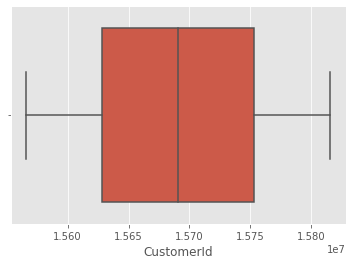

In [50]:
sns.boxplot(data = bankdata, x = 'CustomerId')

# There is no meaningful information in variable CustomerId because it only represent the identity of each customer.

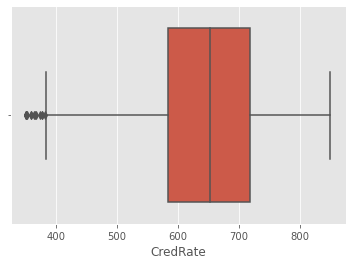

In [51]:
sns.boxplot(data = bankdata, x = 'CredRate')

# 50% of customers have credit score between 580 and 720
# 25% of customers have credit score below 580, and 25% of customers have credit score above 720.
# The median of credit score is around 650.
# The credit score distribution is left skewed, with some outliers that have credit score below 385.
# These outliers drive the mean to the left so that the mean is smaller than median.

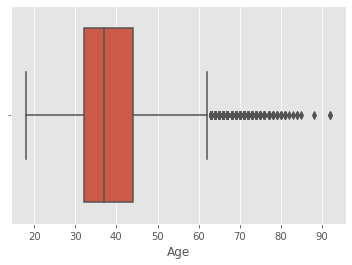

In [52]:
sns.boxplot(data = bankdata, x = 'Age')

# 50% of customers have age between 31 and 43.
# 25% of customers have age under 31, and 25% of customers have age above 43.
# The median of age is around 37.
# Age distribution is right skewed, with many outliers that have age above 61.
# These outliers drive the mean to the right so that the mean is larger than the median.

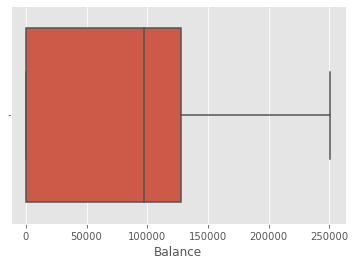

In [54]:
sns.boxplot(data = bankdata, x = 'Balance')

# At least 25% of customers have zero balance.
# 75% of customers have balance under $125000
# The median of balance is around $100000, meaning that around 50% of customers have balance below $100000.
# The distribution is right skewed.

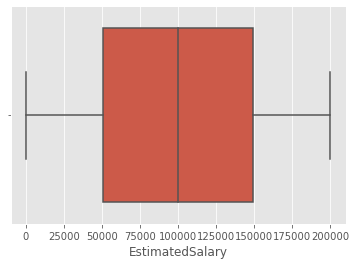

In [57]:
sns.boxplot(data = bankdata, x = 'EstimatedSalary')

# Customer salary is normally distributed.
# 50% of customers have salary between 50000 and 150000.
# 25% of customers have salary below 50000, and 25% of customers have salary above 150000

#### 8. <span style="color:firebrick"> *(2 points)*  </span> Use count plots to perform univariate EDA for all categorical variables in the dataset.

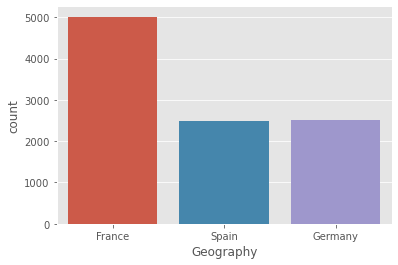

In [58]:
sns.countplot(data = bankdata, x = 'Geography')

# There are 5000 customers from France, 2500 customers from Spain, and 2500 customers from Germany.
# France represents 50% of customer population while Spain and Germany represent the rest 50%.

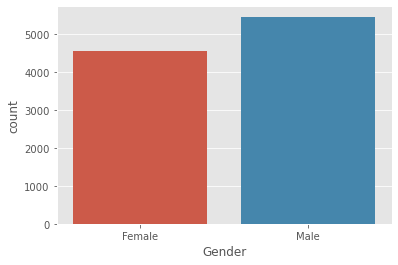

In [59]:
sns.countplot(data = bankdata, x = 'Gender')

# There are 5500 male customers and 4500 female customers.

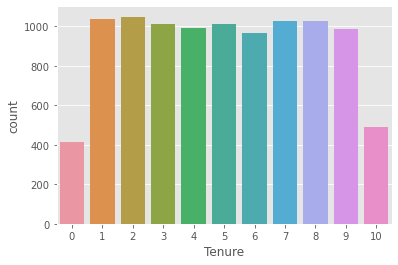

In [60]:
sns.countplot(data = bankdata, x = 'Tenure')

# There are around 9000 customers who have been with the bank for 1-9 years.
# The number of customers for each level of Tenure between 1-9 is around 1000.
# For example, there are around 1000 customers who have been with the bank for 1 year; around 1000 customers who have been with the bank for 2 years etc...
# There are around 400 customers who have been with the bank for less than 1 years and around 500 customers who have been with the bank for 10 years.


1    50.84
2    45.90
3     2.66
4     0.60
Name: Prod Number, dtype: float64

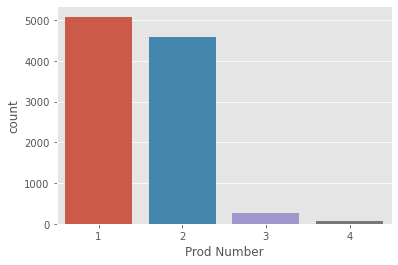

In [63]:
sns.countplot(data = bankdata, x = 'Prod Number')
round(bankdata['Prod Number'].value_counts(normalize = True)*100,2)

# There are around 5000 customers (50.84%) who only use 1 service/product with the bank.
# There are around 4500 customers (45.9%) who use 2 services/products with the bank.
# Only 3.26% of customers use 3 or 4 services/products with the bank.

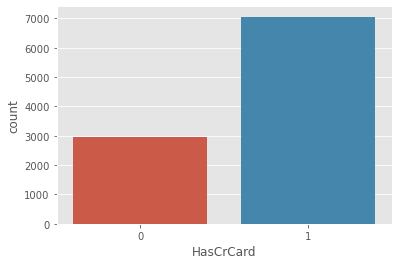

In [64]:
sns.countplot(data = bankdata, x = 'HasCrCard')

# 3000 customers don't have credit card.
# 3000 customers have credit card.

1    51.51
0    48.49
Name: ActMem, dtype: float64

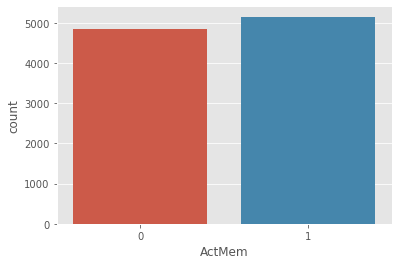

In [66]:
sns.countplot(data = bankdata, x = 'ActMem')
round(bankdata['ActMem'].value_counts(normalize = True)*100,2)

# Nearly half of customers are inactive, meaning that they are not currently using products/services with the bank. They probably only have an empty account with the bank.

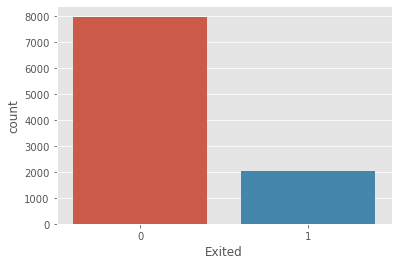

In [67]:
sns.countplot(data = bankdata, x = 'Exited')

# Around 20% of customers have churned. They closed their bank accounts.

#### 9. <span style="color:firebrick"> *(2 points)*  </span> Use bivariate visual EDA (boxplots) to see if there is any relationship between customer churn and all numerical variables.

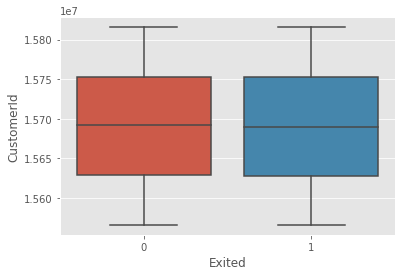

In [68]:
sns.boxplot(data = bankdata,
           x = 'Exited',
           y = 'CustomerId')

# No relationship between customer churn and customer id.

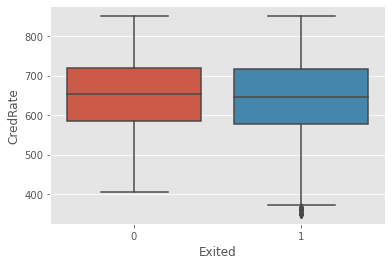

In [69]:
sns.boxplot(data = bankdata,
           x = 'Exited',
           y = 'CredRate')

# There is no clear relationship between customer churn and customer credit scores.
# The distribution of credit scores for current customers and customer churn are very similar.
# For both current customersa and customer churn, 50% of the credit scores are between 590 and 710.
# Also, both distributions have very similar median and mean.

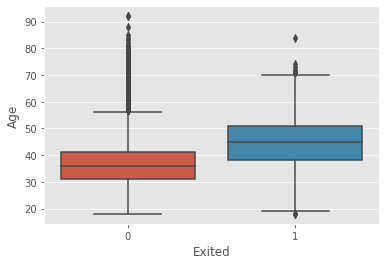

In [70]:
sns.boxplot(data = bankdata,
           x = 'Exited',
           y = 'Age')

# Generally speaking, current customers are younger than customers churn.
# The median age of current customers is lower than that of customers who churned.
# 50% of current customers have age between 30 and 40.
# 50% of customers who churned have age between 40 and 50.
# Also, notice that there are many outliers among current, so it is valuable to figure out the reason
# why certain types of elder stick with the bank while people between 40 and 50 tend to left the bank.

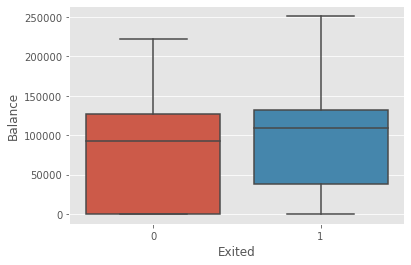

In [72]:
sns.boxplot(data = bankdata,
           x = 'Exited',
           y = 'Balance')

# Customers churn had higher median and average of balance than that of current customers.
# However, that does not mean that customers churn have higher balance than that of current customers.
# 50% of current customers have balance between 0 and 12500. 50% of churned customers have balance between 
# However, there are nearly 25% of current customers whose balances are close to zero, which can be explained by the fact that
# active users tend to withdraw money more frequently.
# With that being said, I would say that there is no clear relationship between balance and the number of customer churn.

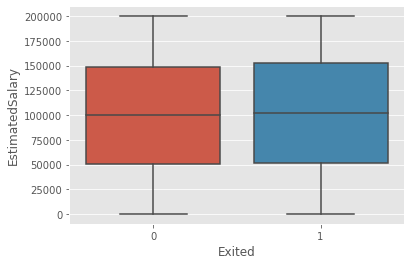

In [73]:
sns.boxplot(data = bankdata,
           x = 'Exited',
           y = 'EstimatedSalary')

# There is no clear relationship between customer churned and estimated salary.
# Both customer churned and current customer have very similar salary distribution.

#### 10. <span style="color:firebrick"> *(2 points)*  </span> Use bivariate visual EDA (heatmaps) to see if there is any relationship between customer churn and all categorical variables.

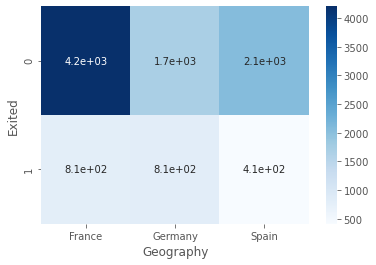

In [75]:
heatmap_Geography = pd.crosstab(bankdata['Exited'],bankdata['Geography'])
sns.heatmap(heatmap_Geography, annot = True, cmap = 'Blues')

# Among customer churned, 810 from France, 810 from Germany, and 410 from Spain.
# Among current customers, 4200 from France, 1700 from Germany, and 2100 from Spain.
# Even though customers from France are much more than customers from Germany, the numbers of customers churned from
# France and Germany are the same.
# It seems like people from Germany are more likely to churn.

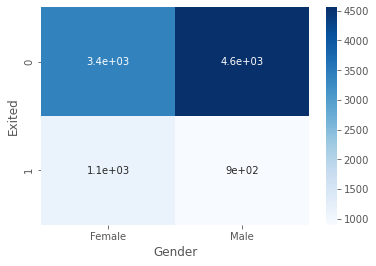

In [76]:
heatmap_Gender = pd.crosstab(bankdata['Exited'],bankdata['Gender'])
sns.heatmap(heatmap_Gender, annot = True, cmap = 'Blues')

# Among customers churned, 1100 are female and 900 are male.
# Among current customers, 3400 are female and 4600 are male.
# The number of current male customers is larger than the number of current female customers, but the opposite is true
# for customers churned
# It seems like female customers are more likely to churn.

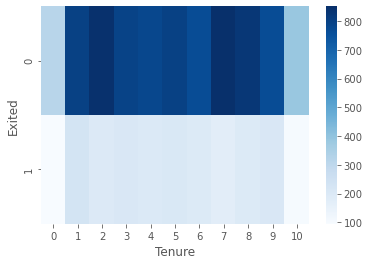

In [80]:
heatmap_Tenure = pd.crosstab(bankdata['Exited'],bankdata['Tenure'])
sns.heatmap(heatmap_Tenure,cmap = 'Blues')

# Customers churned are evenly distributed among Tenure level 1-9
# This is because current customers are also evenly distributed among Tenure level 1-9

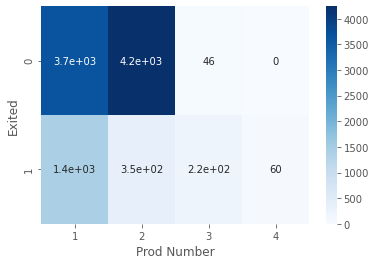

In [82]:
heatmap_ProdNumber = pd.crosstab(bankdata['Exited'],bankdata['Prod Number'])
sns.heatmap(heatmap_ProdNumber, annot = True, cmap = 'Blues')

# If we look at customers churned only, there is a negative relationship between the number of products/services
# and the number of customers churned.
# If we look at all customers, notice that all customers who used to have 4 products/services with the bank
# have left the bank
# Similary, there are only 46 current customers who have 3 products with the bank, but there are 220 customers who
# used to have 3 products left the bank.
# Even though there are 4200 current customers that have 2 products, ther are only 350 customers who used to have
# 2 products left the bank.
# Thus, my advice is that the goal of the bank is to sell 2 products to each customers.

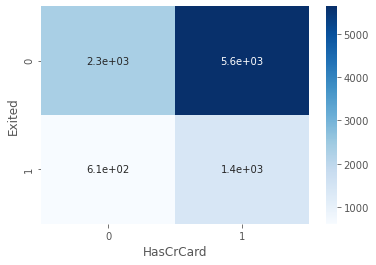

In [83]:
heatmap_HasCrCard = pd.crosstab(bankdata['Exited'],bankdata['HasCrCard'])
sns.heatmap(heatmap_HasCrCard, annot = True, cmap = 'Blues')

# Among customers who have credit card, there are 5600 current customers and 1400 churned customers
# The percentage of customers who left the bank among customers with credit cards is 1400/（5600＋1400） = 20%
# Among customers who don't have credit card, there are 2300 current customers and 610 churned customers.
# The percentage is 610/（2300+610） = 21%, which is very close to the percentage above.

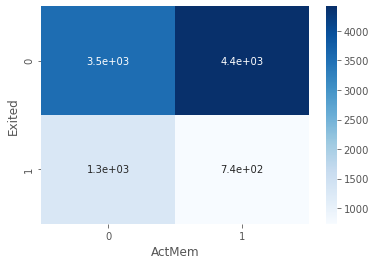

In [84]:
heatmap_ActMem = pd.crosstab(bankdata['Exited'],bankdata['ActMem'])
sns.heatmap(heatmap_ActMem, annot = True, cmap = 'Blues')

# Among active customers, 4400 customers have bank acccounts and 740 don't have bank accounts(churned). 
# The percentage of churned customers is 740/(4400+740) = 14%
# Among inactive customers, 3500 customers have bank accounts and 1300 don't have bank accounts. 
# The percentage of churned customers is 1300/(3500+1300) ＝ 27%
# Thus, inactive customers are more likely to churn.

#### 11. <span style="color:firebrick"> *(1 point)*  </span> Use a facet grid plot to show the the relationship among any 3 variables in our dataset.

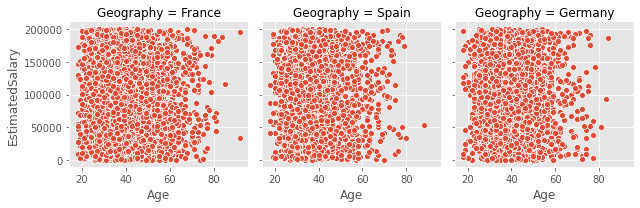

In [89]:
a = sns.FacetGrid(bankdata, col = 'Geography')
a.map(sns.scatterplot, 'Age','EstimatedSalary')

# There is no clear relationship among Geography, Age and EstimatedSalary.

## <span style="color:firebrick"> Grading & Expectations </span>


- The total number of points for this homework is 15 points
- Use this Jupyter Notebook as a template and add your answers to it
- Upload your answers back to blackboard
